# **KMeans Clustering for Customer Segmentation**


The Effect of Marketing Experience on Customer Loyalty in Thai Café Businesses: A Comparative Analysis of SMEs and Large Chains
Chananchida Siriouychai 2641729

In [ ]:
#import libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [ ]:
#Load the dataset
df = pd.read_excel("datset_k.xlsx")

# Encode categorical/ordinal columns
columns_to_encode = [
    'Gender', 'Occupation', 'Age', 'CafeTyp',
    'Monthly Income', 'Spend', 'Frequency'
]

for col in columns_to_encode:
    df[f'{col}_Encoded'] = LabelEncoder().fit_transform(df[col])

# Define feature matrix
X1 = df[[
    'Gender_Encoded', 'Monthly Income_Encoded',
    'Occupation_Encoded', 'Frequency_Encoded',
    'Spend_Encoded', 'CafeTyp_Encoded'
]]

# Standardize features
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X1_pca = pca.fit_transform(X1_scaled)
df.head()

,Gender,Age,Monthly Income,Occupation,Frequency,Spend,Channel,CafeTyp,SE_avg,PF_avg,...,Priority,Unnamed: 14,Unnamed: 15,Gender_Encoded,Occupation_Encoded,Age_Encoded,CafeTyp_Encoded,Monthly Income_Encoded,Spend_Encoded,Frequency_Encoded
0,Female,21–30,"30,001 – 50,000",Student,Almost everyday,100–200,Mix of all three,I don’t have a preference,5.000,5.0,...,PF,NaN,NaN,0,3,0,0,1,0,2
1,Female,21–30,"30,001 – 50,000",Student,Almost everyday,100–200,Delivery,"Large chain café (e.g., Amazon, Starbucks)",4.125,4.0,...,CSR,NaN,NaN,0,3,0,1,1,0,2
2,Female,21–30,"30,001 – 50,000",Company employee,1-2,100–200,Dine in,Local or independent café (SMEs),3.750,4.0,...,PF,NaN,NaN,0,1,0,2,1,0,0
3,Male,21–30,"More than 70,000",Company employee,1-2,100–200,Take-away,Local or independent café (SMEs),3.375,4.0,...,PF,NaN,NaN,1,1,0,2,3,0,0
4,Male,21–30,"Less than 10,000",Student,1-2,100–200,Take-away,I don’t have a preference,5.000,4.0,...,BT,NaN,NaN,1,3,0,0,2,0,0


/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_kmeans.py:1408: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


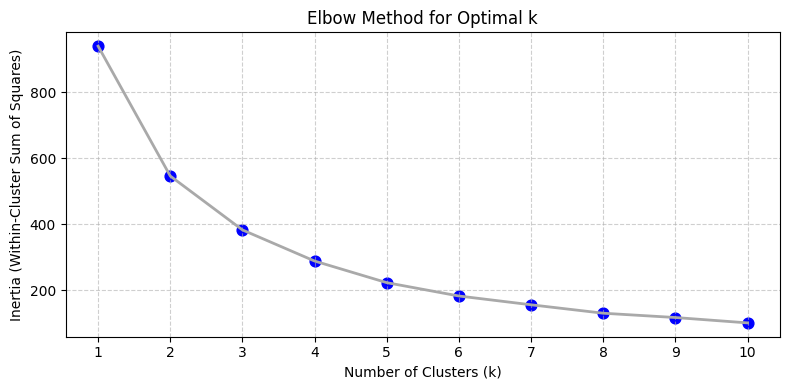

In [ ]:
# Calculate inertia for different cluster counts
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300,
                       tol=0.0001, random_state=24150, algorithm='elkan')
    kmeans.fit(X1_pca)
    inertia.append(kmeans.inertia_)

kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300,
                random_state=42, algorithm='elkan')
kmeans.fit(X1_pca)
df['Cluster'] = kmeans.labels_


# Plot the Elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, color='darkgray', linewidth=2)
plt.scatter(k_range, inertia, color='blue', s=60)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Define additional contextual variables to compare by cluster
contextual_columns = ['Gender', 'Age', 'Monthly Income', 'Occupation', 'Frequency', 'Spend', 'CafeTyp']

# Compute cluster-wise distribution of categorical/contextual variables
cluster_context_summary = df.groupby('Cluster')[contextual_columns].agg(lambda x: x.value_counts().index[0])

# Define loyalty score columns
loyalty_score_columns = ['SE_avg', 'PF_avg', 'CV_avg', 'CSR_avg', 'BT_avg']

# Compute cluster-wise average of loyalty scores
cluster_loyalty_avg = df.groupby('Cluster')[loyalty_score_columns].mean()

# Combine with loyalty scores for full interpretation
full_cluster_profile = pd.concat([cluster_context_summary, cluster_loyalty_avg], axis=1)
full_cluster_profile

,Gender,Age,Monthly Income,Occupation,Frequency,Spend,CafeTyp,SE_avg,PF_avg,CV_avg,CSR_avg,BT_avg
Cluster,,,,,,,,,,,,
0,Female,31–40,"30,001 – 50,000",Company employee,3-5,100–200,Local or independent café (SMEs),4.231959,4.061856,4.085911,4.065292,4.108247
1,Male,21–30,"10,001 – 30,000",Company employee,3-5,Less than 100,"Large chain café (e.g., Amazon, Starbucks)",4.328767,4.141553,4.228311,4.114155,4.092466
2,Female,41–50,"฿50,001 – ฿70,000",Business owner,Almost everyday,100–200,"Large chain café (e.g., Amazon, Starbucks)",4.562500,4.041667,4.125000,4.125000,3.968750
3,Female,31–40,"10,001 – 30,000",Company employee,1-2,100–200,Local or independent café (SMEs),4.141779,3.975391,3.991051,3.991051,4.046980


/tmp/ipython-input-1346919517.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', len(cluster_labels))


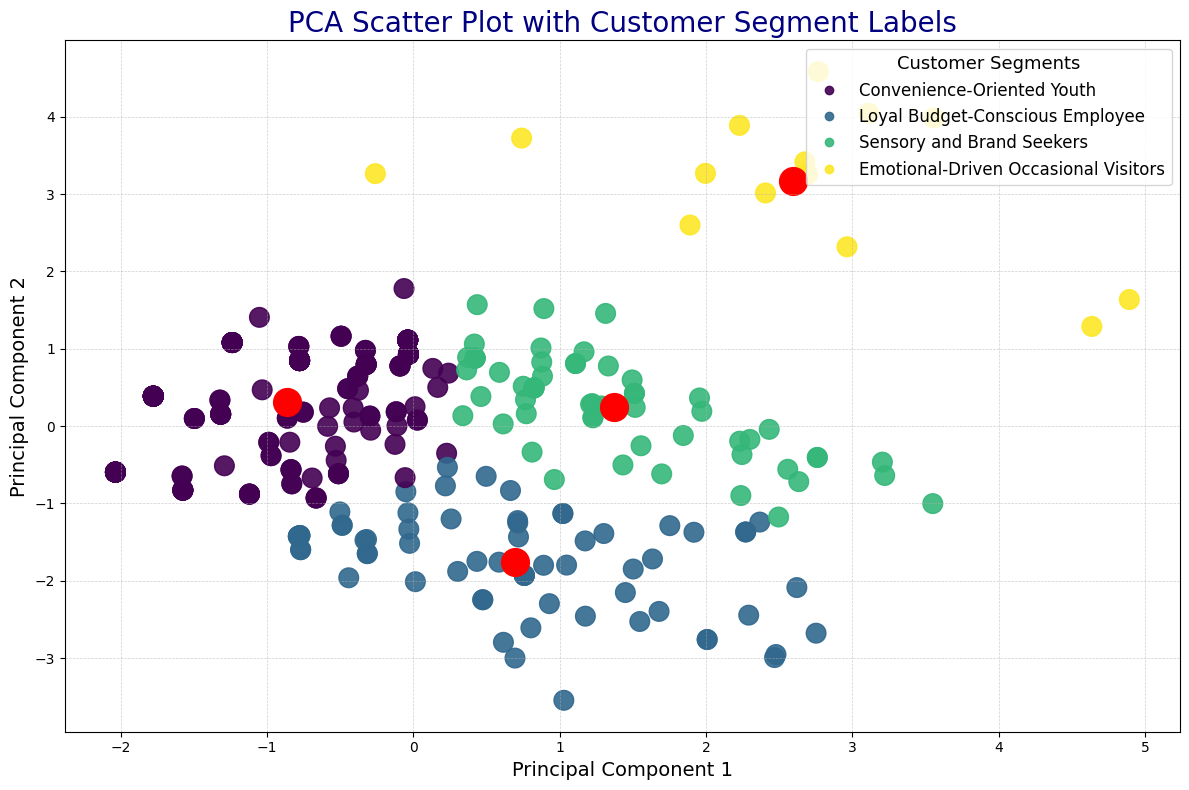

In [ ]:
# Define custom cluster names
cluster_labels = {
    0: "Convenience-Oriented Youth",
    1: "Loyal Budget-Conscious Employee",
    2: "Sensory and Brand Seekers",
    3: "Emotional-Driven Occasional Visitors"
}

# Generate color map
from matplotlib import cm
colors = cm.get_cmap('tab10', len(cluster_labels))

# Plot PCA with clusters
plt.figure(figsize=(12, 8))
plt.title('PCA Scatter Plot with Customer Segment Labels', fontsize=20, color='navy')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

# Plot data points
scatter = plt.scatter(X1_pca[:, 0], X1_pca[:, 1], c=df['Cluster'], cmap='viridis', s=200, alpha=0.9)

# Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=400, c='red', marker='o', label='Centroids')

# Build legend manually
handles, _ = scatter.legend_elements()
ordered_handles = [handles[i] for i in sorted(cluster_labels.keys())]
ordered_labels = [cluster_labels[i] for i in sorted(cluster_labels.keys())]

plt.legend(ordered_handles, ordered_labels, title="Customer Segments", loc='upper right', fontsize=12, title_fontsize='13')

# Format
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Cluster Profiling Table

# Define the list of numeric columns to include in the cluster profiling
numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

cluster_profile = df.groupby('Cluster')[numeric_cols].mean()
print(cluster_profile.round(2))

         SE_avg  PF_avg  CV_avg  CSR_avg  BT_avg  Gender_Encoded  \
Cluster                                                            
0          4.10    3.97    3.98     3.98    4.07            0.09   
1          4.24    4.05    4.09     4.08    4.10            0.07   
2          4.31    4.13    4.17     4.07    4.05            0.88   
3          4.55    4.08    4.21     4.03    3.94            0.54   

         Occupation_Encoded  Channel_Encoded  CafeTyp_Encoded  \
Cluster                                                         
0                      1.01             2.63             1.65   
1                      0.96             2.33             1.44   
2                      1.40             2.01             1.09   
3                      0.92             1.92             1.31   

         Monthly Income_Encoded  Spend_Encoded  Frequency_Encoded  Age_Encoded  
Cluster                                                                         
0                          0.07       

In [ ]:
# Count the number of observations in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()

# Calculate the proportion of each cluster
cluster_proportions = (cluster_counts / len(df)) * 100

# Combine counts and proportions in a DataFrame for display
cluster_summary = pd.DataFrame({
    'Count': cluster_counts,
    'Proportion (%)': cluster_proportions.round(2)
})

print(cluster_summary)


         Count  Proportion (%)
Cluster                       
0          108           33.03
1          138           42.20
2           68           20.80
3           13            3.98


In [ ]:
# Export the cluster_profile DataFrame to an Excel file
cluster_summary.to_excel('cluster_summary.xlsx')
print("Cluster profile exported to cluster_summary.xlsx")

Cluster profile exported to cluster_summary.xlsx
